In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

In [4]:
df=pd.read_csv('C:/Users/User/Downloads/result_df.csv',encoding='utf-8')
df

,Unnamed: 0.1,Unnamed: 0,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,...,Frequency_s,Monetary_s,labels_k,Recency_8,Frequency_8,Monetary_8,RFM_Score,RFM_Class,고객구분_New,prediction
0,6,6,w8NeFjRo,2,38,1,20170609,19,1,0,...,0.025141,0.001804,1,8,5,4,61.056236,잠재충성고객,간헐,연속
1,9,9,OdlqFy2F,2,42,1,20100816,101,0,0,...,0.017980,0.003194,1,8,4,7,64.671510,잠재충성고객,간헐,연속
2,11,11,PjmGznTm,1,45,1,19950524,284,0,0,...,0.026665,0.001722,1,8,5,4,61.056236,잠재충성고객,간헐,연속
3,16,16,Os3UUS88,1,80,1,20171128,14,0,0,...,0.032759,0.001639,1,8,5,4,61.056236,잠재충성고객,간헐,연속
4,25,25,CRX23tPQ,1,34,1,20170921,16,1,0,...,0.025598,0.001177,1,8,5,3,57.226267,놓치면안될고객,간헐,연속
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69384,299982,299982,g7KF9R6g,1,56,1,20150903,40,1,0,...,0.027579,0.001671,1,8,5,4,61.056236,잠재충성고객,간헐,연속
69385,299983,299983,Tp3muDcV,1,55,1,20160219,35,0,0,...,0.035654,0.001837,1,8,5,5,64.886204,잠재충성고객,간헐,연속
69386,299986,299986,4n8aFEwI,1,45,1,20071017,135,0,0,...,0.037635,0.002943,1,8,5,6,68.716172,잠재충성고객,간헐,연속
69387,299996,299996,EDQYlTTX,2,69,1,20150417,45,0,0,...,0.021332,0.001770,1,8,4,4,53.181605,놓치면안될고객,간헐,연속


In [5]:
df['prediction'].value_counts()

연속    54947
휴면    14442
Name: prediction, dtype: int64

In [6]:
df1=df[df['prediction']=='연속']

In [7]:
df2 = df1.sample(n=10000, random_state=42)

# 소비패턴

In [8]:
df3=df2[[  '쇼핑_도소매_이용금액','쇼핑_백화점_이용금액' , '쇼핑_마트_이용금액',  '쇼핑_슈퍼마켓_이용금액' ,'쇼핑_편의점_이용금액' , '쇼핑_아울렛_이용금액' , '쇼핑_온라인_이용금액' , 
'쇼핑_기타_이용금액' ,   '교통_주유이용금액' ,'교통_정비이용금액' ,'교통_통행료이용금액' ,'교통_버스지하철이용금액'  ,'교통_택시이용금액' ,
'교통_철도버스이용금액' ,'여유_운동이용금액', '여유_Pet이용금액' , '여유_공연이용금액' ,'여유_공원이용금액' ,'여유_숙박이용금액' ,
'여유_여행이용금액' ,'여유_항공이용금액' ,'여유_기타이용금액' , '납부_통신비이용금액' ,'납부_관리비이용금액' ,'납부_렌탈료이용금액' ,
'납부_가스전기료이용금액'  ,'납부_보험료이용금액' ,'납부_유선방송이용금액' ,'납부_건강연금이용금액' ,'납부_기타이용금액' ,'이용금액_요식',  '이용금액_의료',  
 '이용금액_교육' ,'이용금액_사교활동', '이용금액_일상생활' ,'이용금액_해외' ]]

In [9]:
df3 = df3.astype(np.int32)

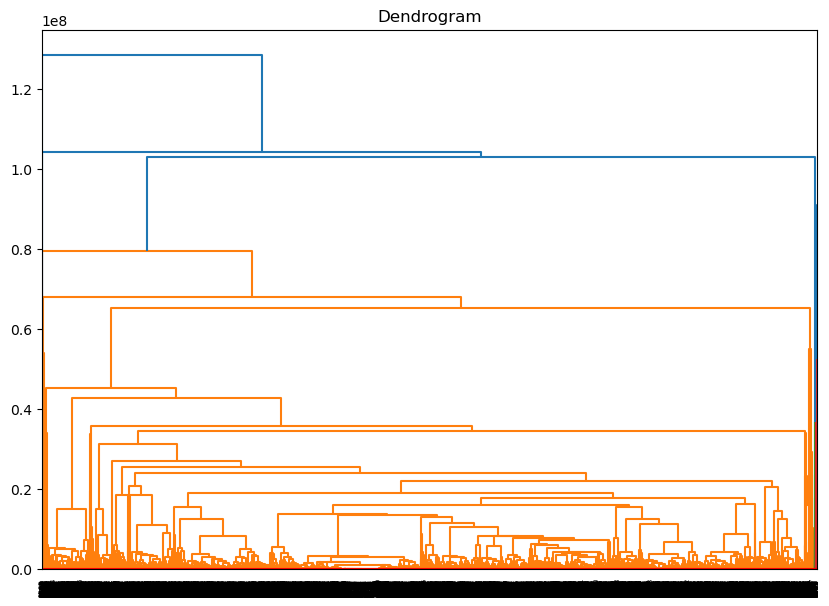

In [11]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(df3, method='ward', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.show()

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

matrix1 = df3.values

# 데이터 스케일링
scaler1 = StandardScaler()
scaled_matrix1 = scaler1.fit_transform(matrix1)

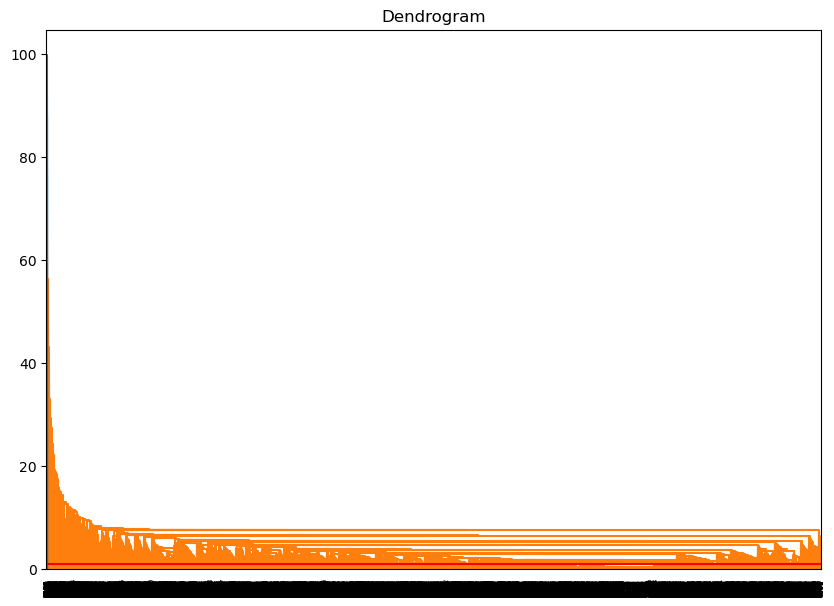

In [20]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(scaled_matrix1, method='average', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.show()

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# 분할할 임계값 설정
threshold = 110  # 예시로 임계값을 0.5로 설정

# 임계값을 기반으로 클러스터 분할
cluster_labels = fcluster(clusters, threshold, criterion='distance')

In [19]:
df2['cluster'] = cluster_labels
df2['cluster'].value_counts()

9     9193
7      420
6      334
8       23
3        9
4        6
5        5
2        3
1        2
13       1
10       1
12       1
14       1
11       1
Name: cluster, dtype: int64

In [69]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,random_state=42).fit(cosine_sim_df1)
km.cluster_centers_

# 클러스터링을 통해 군집화
predict = pd.DataFrame(km.predict(cosine_sim_df1))
predict.columns = ['Cluster']
predict.head(5)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster
0,1
1,3
2,4
3,2
4,4


In [70]:
predict.value_counts()

Cluster
0          3403
1          2671
2          1992
4          1263
3           671
dtype: int64

In [71]:
df2['cluster']=predict['Cluster'].values
df2

,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,교통_정비이용금액,...,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외,cluster
7388,0,0,0,0,0,0,0,0,97000,0,...,0,0,0,0,19800,0,110500,0,14849,1
26896,56600,0,0,32350,82900,0,0,0,0,0,...,0,0,9900,9000,0,0,112400,13000,0,3
11745,0,0,0,0,45000,0,0,0,562000,0,...,0,0,0,0,62950,0,0,0,0,4
40651,132000,0,0,0,9000,0,0,0,0,0,...,0,0,0,0,67600,0,162500,0,0,2
29215,0,0,0,13500,0,0,1434000,0,24975,0,...,0,0,152720,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37011,65400,0,14790,73550,0,0,0,29500,88000,0,...,0,0,0,0,0,0,102000,0,0,1
16369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
37651,0,0,0,0,12000,0,1922873,40110,0,0,...,0,0,0,0,5300,0,0,0,0,1
55739,877200,0,0,45880,0,0,68700,0,100000,0,...,0,0,0,0,84700,0,27000,50000,0,1


In [16]:
cluster_mean=df2.groupby('cluster').mean()
cluster_mean

,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,교통_정비이용금액,...,납부_보험료이용금액,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외
cluster,,,,,,,,,,,,,,,,,,,,,
0,223252.128416,55262.000588,113283.364678,112744.411402,42080.082280,35748.625331,209770.803115,37336.079929,144902.275933,47743.856009,...,71327.932413,415.608875,6391.107552,101283.196885,31802.494857,214278.003526,83520.049956,326103.879812,32069.767852,51745.317367
1,150178.156870,28387.189817,29570.991389,31231.434294,8509.329839,9515.009360,339989.129539,18703.779483,108617.880943,29619.421939,...,90837.149382,0.000000,2867.406964,104163.655185,6593.000000,174911.083115,106590.946462,121815.711718,10467.234744,80503.199551
2,37747.669177,5793.097390,6749.472892,8772.158635,2858.750000,986.787149,114542.447289,3871.616466,16930.444779,15661.154618,...,7895.556727,11.447289,0.000000,9394.152108,1751.086345,47739.567269,9639.518072,36920.825803,1871.606426,17381.631024
3,68940.470939,19849.985097,27171.554396,42499.067064,10810.894188,7794.991058,91412.149031,9196.915052,21249.456036,9728.675112,...,16479.709389,30.366617,82.242921,10862.614009,8936.712370,97866.262295,24637.496274,93366.304024,7806.020864,24749.280179
4,73112.923990,17396.693587,32976.781473,27285.930325,12638.630245,5410.015835,235018.809184,13036.318290,84940.992874,15596.209818,...,84469.520982,39.047506,503.844022,34793.265241,7736.041172,73533.187648,69976.947743,113222.252573,10899.192399,14513.653998


C:\Users\User\AppData\Local\Temp\ipykernel_12688\9024096.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


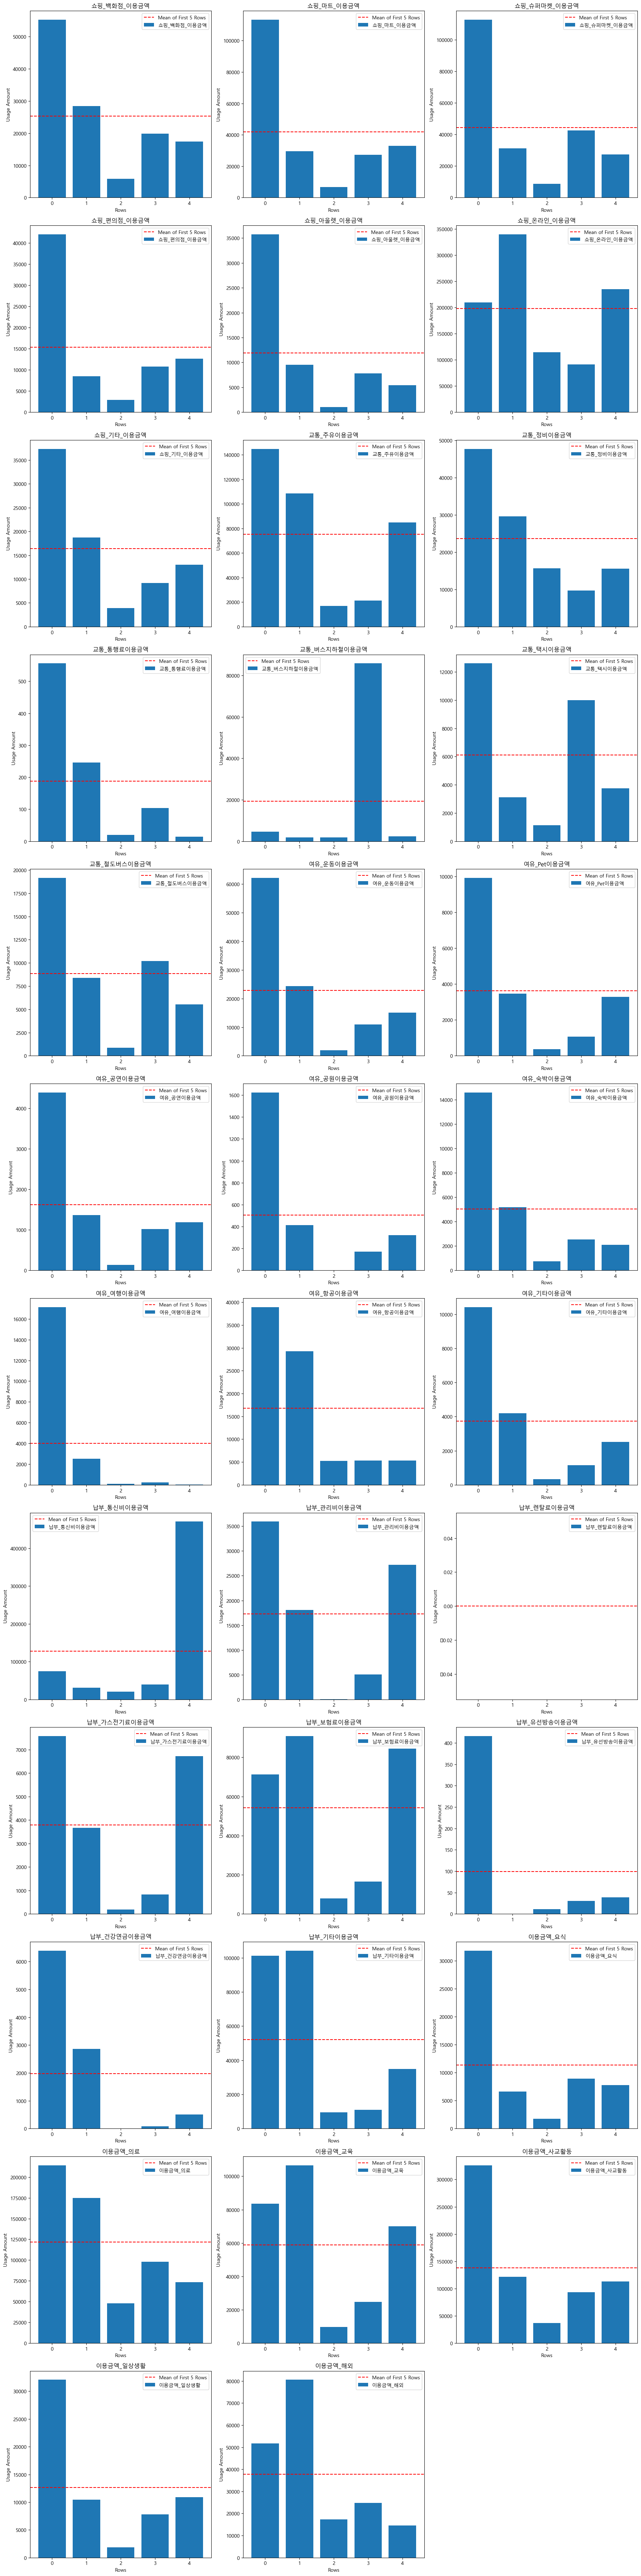

In [18]:
plt.rc('font', family='Malgun Gothic')
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:5, 1:].mean()

# Plotting for each column
num_columns = len(cluster_mean.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = cluster_mean.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(5), cluster_mean.iloc[:5, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(5))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [37]:
df2_mean=df2.groupby('cluster').mean()
df2_mean

C:\Users\User\AppData\Local\Temp\ipykernel_12688\1768555959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_mean=df2.groupby('cluster').mean()


,Unnamed: 0.1,Unnamed: 0,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,...,Frequency,Monetary,Recency_s,Frequency_s,Monetary_s,labels_k,Recency_8,Frequency_8,Monetary_8,RFM_Score
cluster,,,,,,,,,,,,,,,,,,,,,
0,149950.437261,149950.437261,1.474875,46.233617,0.999118,2.012133e+07,77.877167,0.424919,0.008228,0.340876,...,168.852483,1.058788e+07,0.000759,0.029080,0.002438,1.000000,7.990890,4.763738,5.131355,63.521566
1,147922.848746,147922.848746,1.466492,46.102583,0.998502,2.011317e+07,87.634594,0.446275,0.014976,0.384500,...,143.457507,9.662354e+06,0.002808,0.025211,0.002305,1.000000,7.966305,4.496818,4.985399,60.841105
2,149303.225904,149303.225904,1.464357,46.470884,0.976406,2.011580e+07,84.464357,0.401104,0.046687,0.386546,...,163.474900,6.960748e+06,0.073377,0.028261,0.001917,0.954317,7.313755,4.740964,4.256526,59.453068
3,147800.910581,147800.910581,1.520119,46.713860,0.998510,2.011233e+07,88.690015,0.380030,0.005961,0.307004,...,234.005961,4.170889e+06,0.003477,0.039007,0.001517,1.000000,7.958271,5.470939,3.545455,62.990620
4,149327.318290,149327.318290,1.473476,45.785432,0.999208,2.013757e+07,58.141726,0.473476,0.011085,0.387173,...,146.676960,8.822139e+06,0.000528,0.025701,0.002185,1.000000,7.993666,4.542359,4.977039,61.189475


In [27]:
gender = df2.groupby(['cluster','남녀구분코드']).size().unstack()
gender

남녀구분코드,1,2
cluster,,
0,1787,1616
1,1425,1246
2,1067,925
3,322,349
4,665,598


In [24]:
life_stage=a = df2.groupby(['cluster','Life_Stage']).size().unstack()
life_stage

Life_Stage,1.Single,2.가족형성기,3.자녀출산기,4.자녀성장기(1),5.자녀성장기(2),6.자녀출가기,7.노령
cluster,,,,,,,
0,61,246,301,1132,989,300,374
1,37,156,217,913,743,272,333
2,84,184,192,638,471,175,248
3,16,51,43,130,185,109,137
4,47,166,149,496,316,50,39


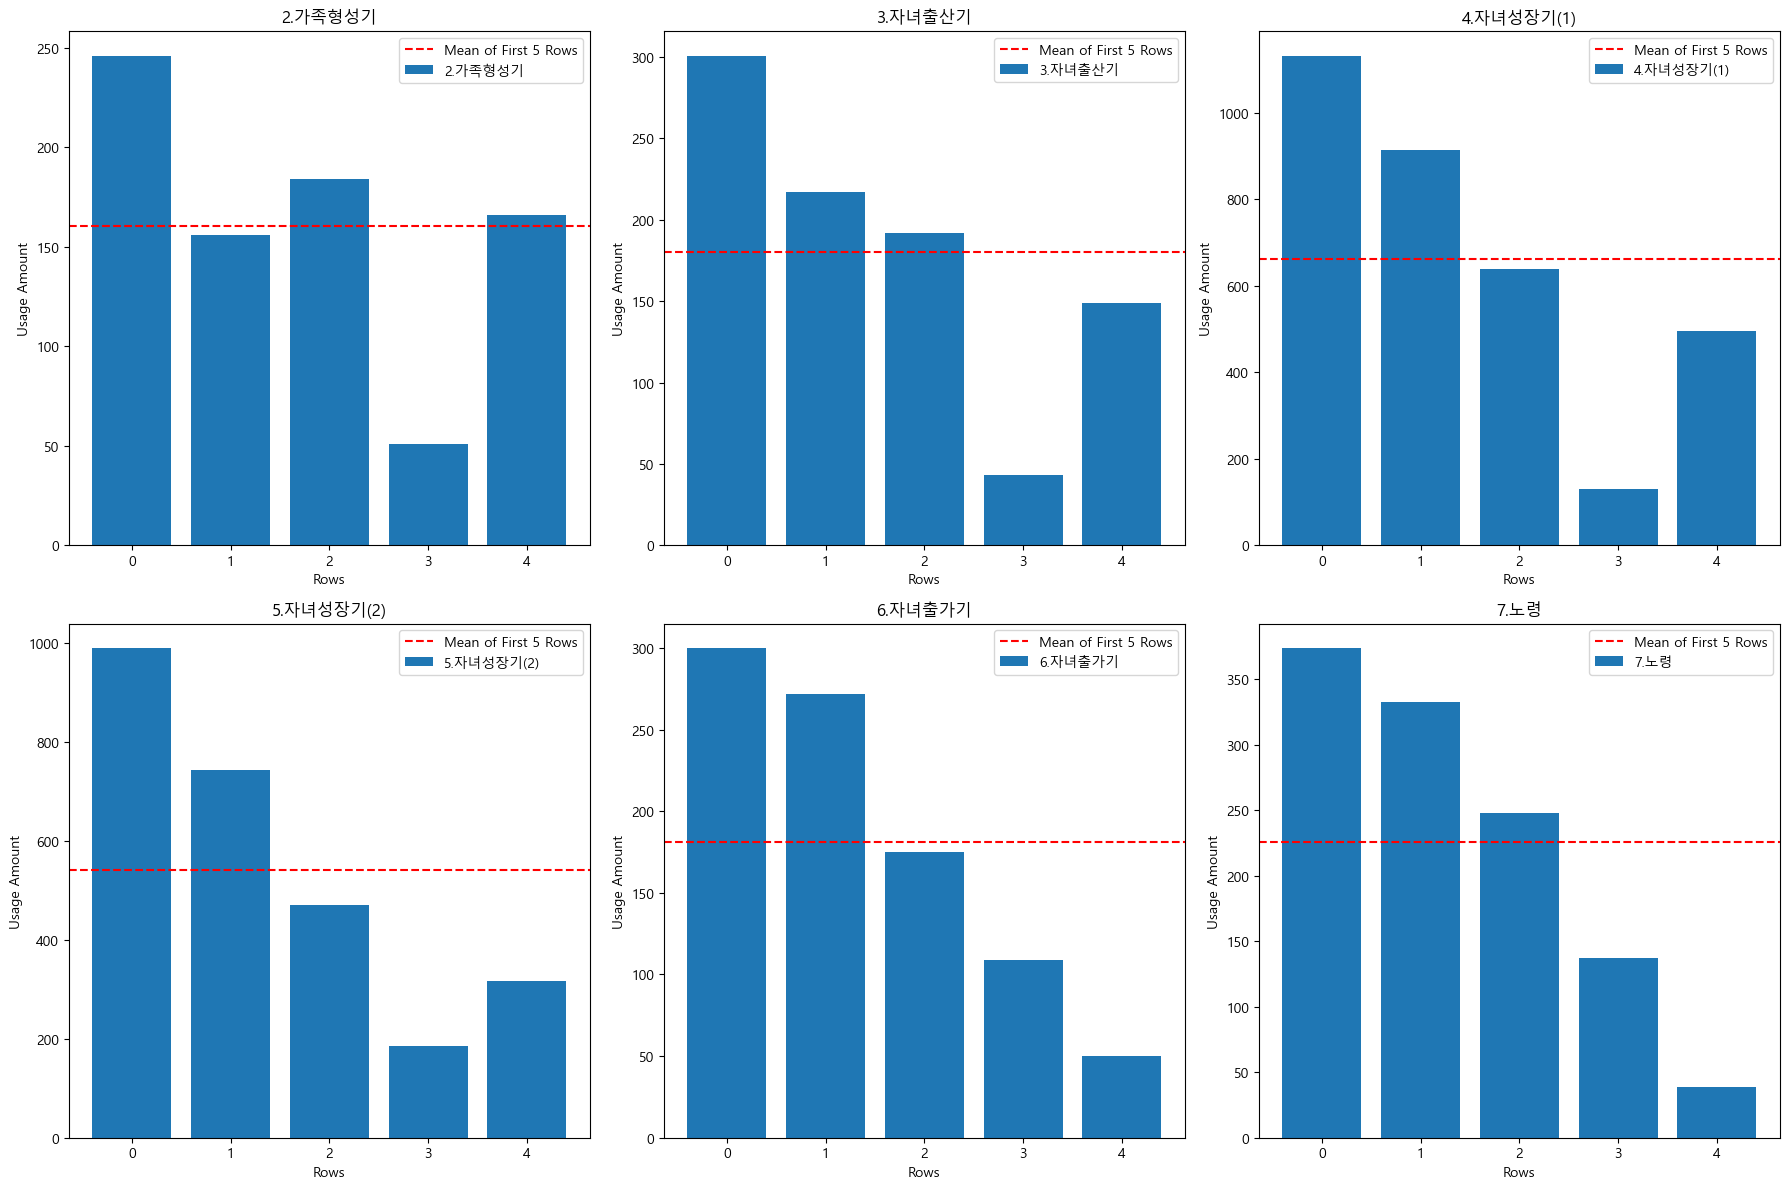

In [25]:
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = life_stage.iloc[:5, 1:].mean()

# Plotting for each column
num_columns = len(life_stage.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = life_stage.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(5), life_stage.iloc[:5, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(5))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# 군집 14개

In [72]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=14,random_state=42).fit(cosine_sim_df1)
km.cluster_centers_

# 클러스터링을 통해 군집화
predict = pd.DataFrame(km.predict(cosine_sim_df1))
predict.columns = ['Cluster']
predict.head(5)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster
0,4
1,6
2,0
3,13
4,4


In [73]:
predict.value_counts()

Cluster
4          1601
3          1412
9          1080
7           775
5           715
2           648
6           569
0           541
8           531
10          531
13          438
11          435
1           396
12          328
dtype: int64

In [74]:
df2['cluster']=predict['Cluster'].values

In [13]:
cluster_mean=df3.groupby('cluster').mean()
cluster_mean

,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,교통_정비이용금액,...,납부_보험료이용금액,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외
cluster,,,,,,,,,,,,,,,,,,,,,
0,103035.774492,9098.672828,24621.515712,31622.426987,10410.110906,3473.031423,8.766357e+04,25069.085028,697990.277264,70508.865065,...,26005.349353,0.000000,0.000000,40551.794824,6920.887246,112969.112754,21304.787431,187622.563771,8518.354898,18982.510166
1,59262.593434,21385.959596,21033.131313,16353.611111,6981.994949,3942.651515,1.943568e+06,7317.702020,32523.858586,5945.593434,...,11976.469697,0.000000,0.000000,66776.280303,7738.542929,74992.358586,25524.015152,71763.169192,6630.277778,65955.664141
2,201723.351852,25019.441358,60915.185185,355781.191358,12502.808642,13277.515432,1.134736e+05,33455.447531,72212.496914,14744.907407,...,25798.501543,0.000000,20.486111,29239.856481,15678.888889,141963.441358,36466.273148,195606.064815,17852.901235,9077.415123
3,19196.953258,4099.135977,3863.640227,4414.433428,1633.031161,538.158640,7.533615e+04,2271.352691,11036.340652,13748.498584,...,4824.639518,0.000000,0.000000,7722.269830,820.375354,29046.684136,3971.926346,20546.260623,1213.611898,12849.759915
4,368511.496565,89792.028732,31054.036852,33984.808869,12077.489069,49976.732042,1.936321e+05,43936.264834,71717.415990,76186.956277,...,27410.092442,763.466583,16912.813866,285079.468457,11516.046221,393619.452217,214962.954403,246576.756402,40413.337914,157327.424110
5,85241.510490,22066.732867,37556.811189,37833.899301,16368.405594,6664.671329,2.231792e+05,14999.482517,82794.090909,17530.029371,...,48485.076923,0.000000,0.000000,33281.149650,10119.734266,71788.525874,64555.117483,152250.177622,12905.216783,18288.911888
6,64796.553603,17561.318102,22358.332162,35351.940246,9599.191564,6203.093146,8.501722e+04,8544.991213,17201.606327,8014.588752,...,14791.659051,35.810193,73.655536,11158.442882,8222.478032,94250.467487,28505.553603,88264.780316,6457.750439,23882.456942
7,151025.980645,47059.390968,67109.042581,72597.734194,26485.316129,29018.505806,2.070865e+05,28578.567742,96127.046452,21732.729032,...,19815.538065,62.301935,488.376774,24511.958710,85039.845161,147089.978065,67525.076129,456339.415484,32984.800000,21953.131613
8,95399.613936,27374.463277,36039.868173,69324.809793,179465.819209,9678.020716,1.655432e+05,19781.977401,116149.704331,36760.638418,...,31546.506591,194.376648,130.506591,28637.312618,16202.956685,79428.060264,26329.717514,345272.052731,19516.873823,15554.649718


C:\Users\User\AppData\Local\Temp\ipykernel_11228\619950579.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


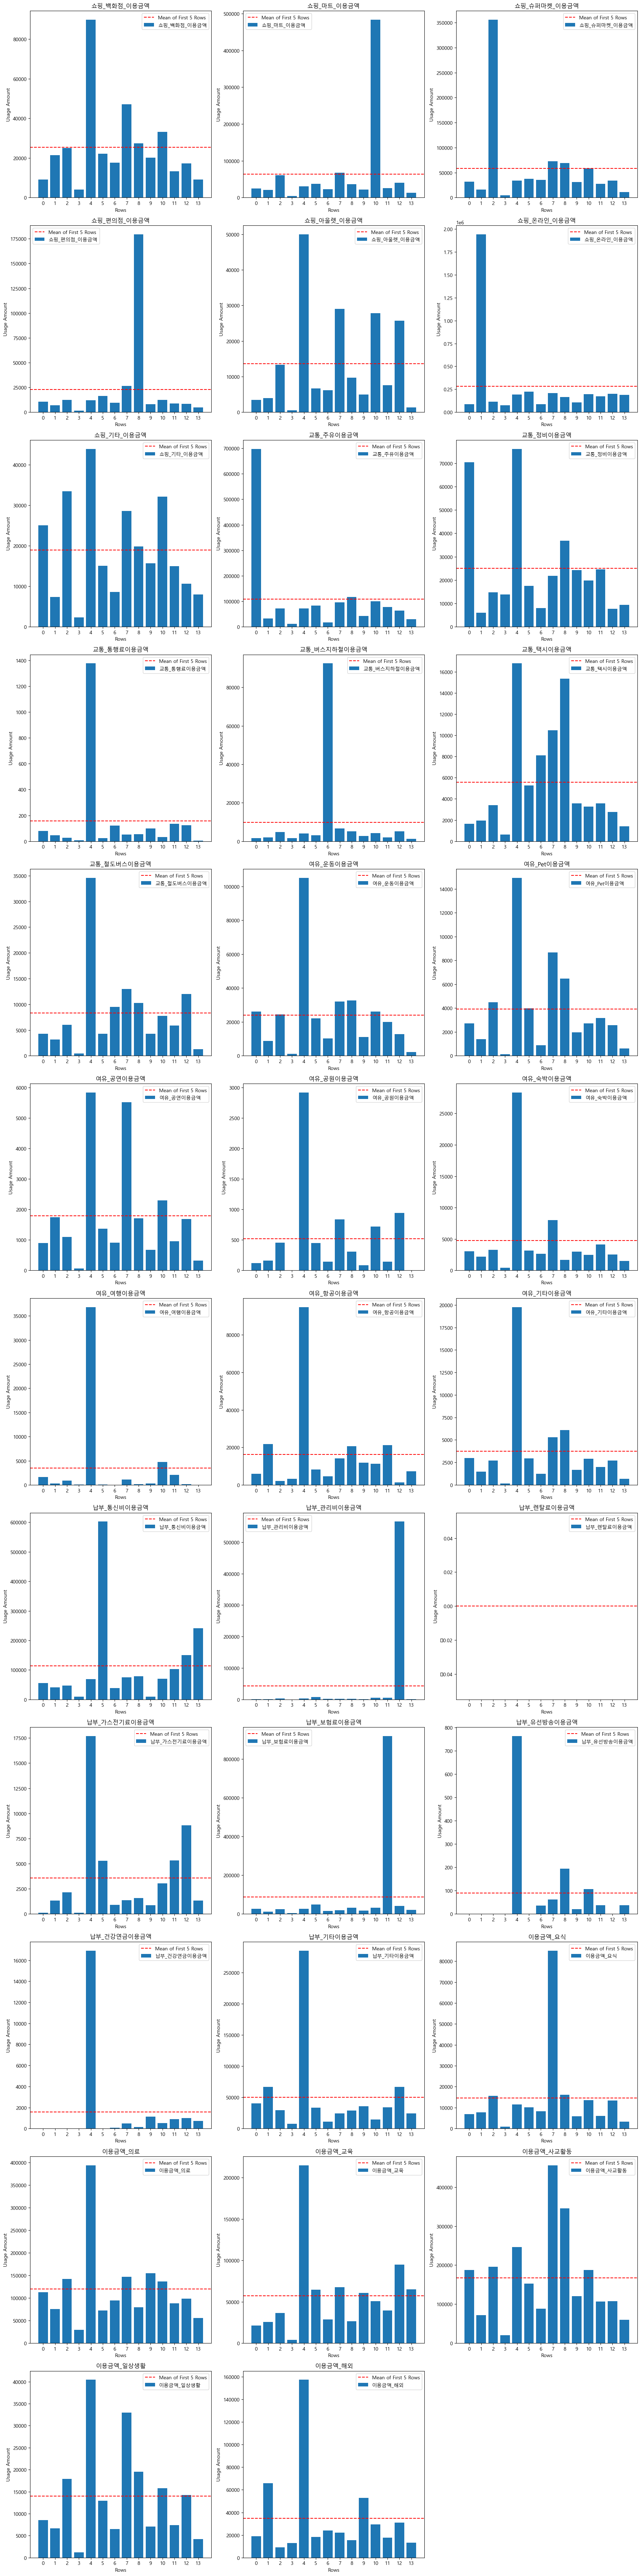

In [15]:
plt.rc('font', family='Malgun Gothic')
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:14, 1:].mean()

# Plotting for each column
num_columns = len(cluster_mean.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = cluster_mean.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(14), cluster_mean.iloc[:14, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(14))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# 군집 14개 소비패턴+연령

In [16]:
df1=df[df['prediction']=='연속']
df2 = df1.sample(n=10000, random_state=42)
df3=df2[[ '연령', '쇼핑_도소매_이용금액','쇼핑_백화점_이용금액' , '쇼핑_마트_이용금액',  '쇼핑_슈퍼마켓_이용금액' ,'쇼핑_편의점_이용금액' , '쇼핑_아울렛_이용금액' , '쇼핑_온라인_이용금액' , 
'쇼핑_기타_이용금액' ,   '교통_주유이용금액' ,'교통_정비이용금액' ,'교통_통행료이용금액' ,'교통_버스지하철이용금액'  ,'교통_택시이용금액' ,
'교통_철도버스이용금액' ,'여유_운동이용금액', '여유_Pet이용금액' , '여유_공연이용금액' ,'여유_공원이용금액' ,'여유_숙박이용금액' ,
'여유_여행이용금액' ,'여유_항공이용금액' ,'여유_기타이용금액' , '납부_통신비이용금액' ,'납부_관리비이용금액' ,'납부_렌탈료이용금액' ,
'납부_가스전기료이용금액'  ,'납부_보험료이용금액' ,'납부_유선방송이용금액' ,'납부_건강연금이용금액' ,'납부_기타이용금액' ,'이용금액_요식',  '이용금액_의료',  
 '이용금액_교육' ,'이용금액_사교활동', '이용금액_일상생활' ,'이용금액_해외' ]]
df3 = df3.astype(np.int32)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

matrix1 = df3.values

# 데이터 스케일링
scaler1 = StandardScaler()
scaled_matrix1 = scaler1.fit_transform(matrix1)

# 코사인 유사도 계산
cosine_sim1 = cosine_similarity(scaled_matrix1)

# 데이터 프레임 형태로 저장
cosine_sim_df1 = pd.DataFrame(cosine_sim1, df3.index, columns=df3.index)
cosine_sim_df1.iloc[:4,:4]
from sklearn.cluster import KMeans
km = KMeans(n_clusters=14,random_state=42).fit(cosine_sim_df1)
km.cluster_centers_

# 클러스터링을 통해 군집화
predict = pd.DataFrame(km.predict(cosine_sim_df1))
predict.columns = ['Cluster']
predict.head(5)
predict.value_counts()

df3['cluster']=predict['Cluster'].values
df3

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,연령,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,...,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외,cluster
7388,56,0,0,0,0,0,0,0,0,97000,...,0,0,0,0,19800,0,110500,0,14849,5
26896,32,56600,0,0,32350,82900,0,0,0,0,...,0,0,9900,9000,0,0,112400,13000,0,6
11745,41,0,0,0,0,45000,0,0,0,562000,...,0,0,0,0,62950,0,0,0,0,12
40651,45,132000,0,0,0,9000,0,0,0,0,...,0,0,0,0,67600,0,162500,0,0,2
29215,45,0,0,0,13500,0,0,1434000,0,24975,...,0,0,152720,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37011,62,65400,0,14790,73550,0,0,0,29500,88000,...,0,0,0,0,0,0,102000,0,0,4
16369,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
37651,51,0,0,0,0,12000,0,1922873,40110,0,...,0,0,0,0,5300,0,0,0,0,5
55739,42,877200,0,0,45880,0,0,68700,0,100000,...,0,0,0,0,84700,0,27000,50000,0,1


In [18]:
predict.value_counts()

Cluster
11         1516
4           920
6           904
10          854
0           762
5           737
3           717
13          661
2           593
7           554
9           494
12          457
8           455
1           376
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_11228\3512295362.py:31: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


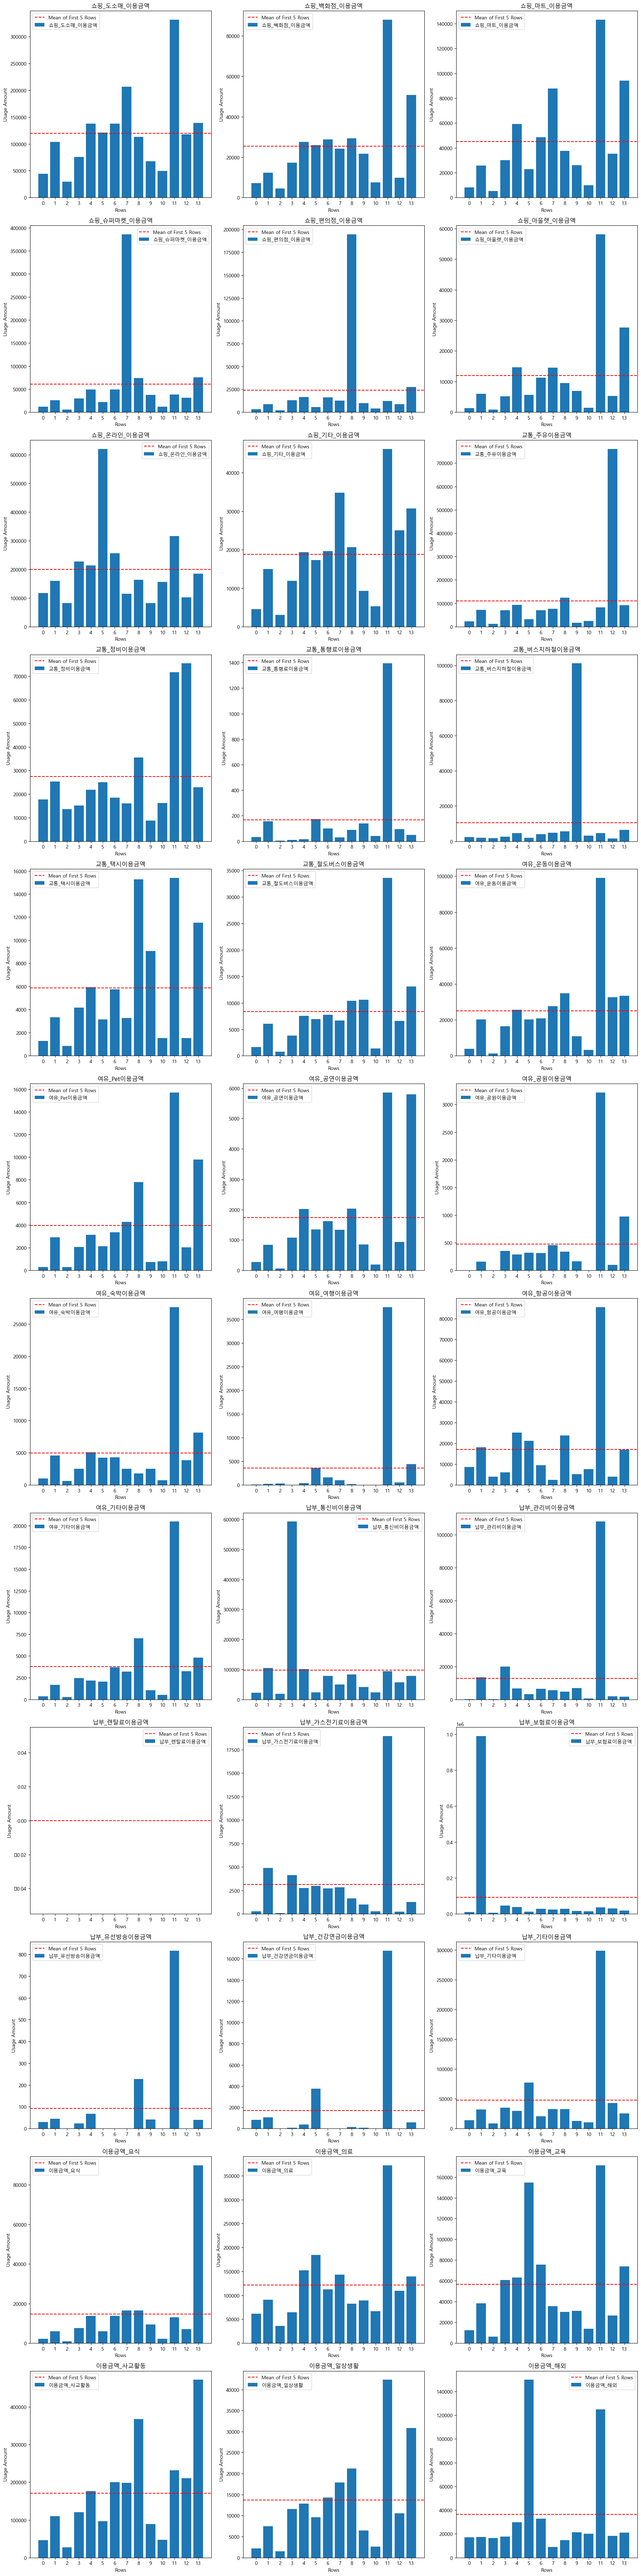

In [20]:
cluster_mean=df3.groupby('cluster').mean()
cluster_mean

plt.rc('font', family='Malgun Gothic')
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:14, 1:].mean()

# Plotting for each column
num_columns = len(cluster_mean.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = cluster_mean.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(14), cluster_mean.iloc[:14, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(14))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [22]:
cluster_mean

,연령,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,...,납부_보험료이용금액,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외
cluster,,,,,,,,,,,,,,,,,,,,,
0,59.451444,44549.485564,7243.188976,8058.136483,11793.044619,3374.225722,1348.608924,117552.234908,4552.007874,23485.020997,...,11834.754593,29.925197,820.947507,14097.942257,2217.270341,61434.774278,12459.514436,46775.669291,2232.112861,17258.224409
1,46.324468,103818.369681,12321.143617,25753.757979,25475.159574,8561.010638,5969.095745,159923.803191,14995.531915,71647.183511,...,989228.944149,44.273936,1068.659574,31814.640957,6016.861702,90774.069149,38336.941489,109617.489362,7481.914894,17560.228723
2,46.021922,29499.106239,4448.684654,5315.362563,5414.907251,2198.600337,796.087690,82981.433390,3101.854975,12430.919056,...,6099.224283,0.000000,0.000000,8512.738617,929.258010,36262.647555,6236.593592,27287.639123,1468.634064,16368.666105
3,43.475593,75523.417015,17175.249651,30006.276151,29634.146444,12963.960948,5113.640167,227548.649930,11907.085077,69628.281729,...,47615.853556,23.012552,59.297071,34771.810321,7608.214784,64314.847978,60829.944212,120160.937238,11612.133891,17722.380753
4,64.784783,137643.940217,27494.565217,59128.151087,49132.270652,16670.760870,14681.771739,213922.504348,19342.380435,93653.933696,...,39414.592391,67.818478,383.583696,29568.100000,13786.663043,152431.196739,63332.076087,176593.303261,12829.504348,29746.282609
5,47.333786,121177.020353,25870.219810,22799.552239,22257.549525,5621.886024,5642.485753,620352.957938,17296.702849,31559.563094,...,11963.919946,0.000000,3770.077341,77371.560380,6036.865672,184096.715061,154531.044776,96834.725916,9636.797829,149787.982361
6,31.523230,137810.560841,28832.828540,48535.300885,49387.973451,16290.453540,11308.240044,256652.485619,19593.296460,70372.888274,...,29018.387168,0.000000,0.000000,20311.408186,13827.271018,112222.359513,75752.129425,199852.498894,14278.119469,32770.381637
7,45.588448,206422.924188,24221.115523,87694.480144,385972.007220,12590.342960,14488.772563,115181.375451,34798.736462,77130.406137,...,25250.046931,0.000000,0.000000,32518.658845,16536.588448,142992.003610,35645.198556,198835.180505,17861.985560,8911.337545
8,46.098901,113262.692308,29374.747253,37595.934066,74334.887912,194685.846154,9550.241758,164069.380220,20698.087912,123987.593407,...,29007.417582,226.843956,152.305495,32500.153846,16492.703297,82809.142857,30200.439560,367724.813187,21199.736264,14714.476923


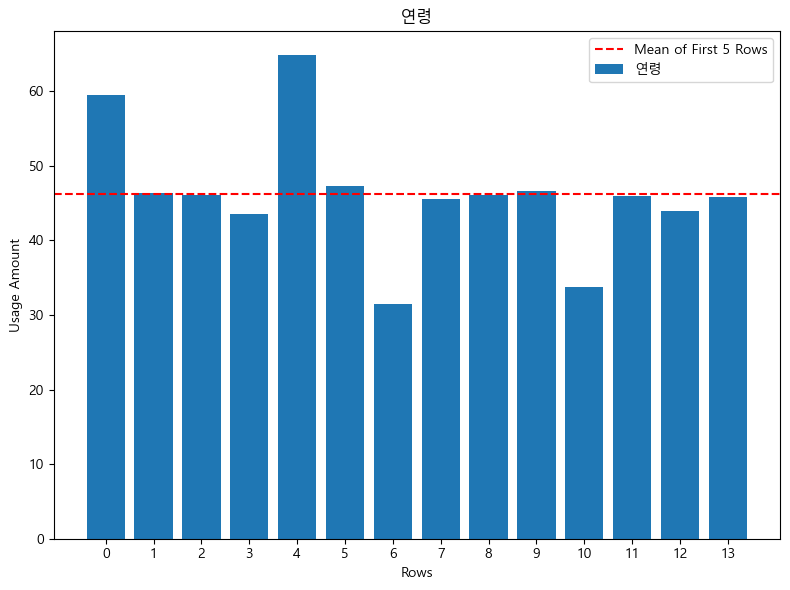

In [24]:
plt.rc('font', family='Malgun Gothic')
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:14].mean()

# Plotting
plt.figure(figsize=(8, 6))

# Plotting the bar graph for the first 5 rows
plt.bar(range(14), cluster_mean['연령'][:14], label='연령')

# Plotting the red line for the mean of the first 5 rows
plt.axhline(y=mean_of_first_5_rows['연령'], color='r', linestyle='--', label='Mean of First 5 Rows')

plt.xlabel('Rows')
plt.ylabel('Usage Amount')
plt.title('연령')
plt.legend()

plt.xticks(range(14))
plt.tight_layout()
plt.show()

# pred_휴면

In [47]:
new_=df[df['prediction']=='휴면']
new_df=new_[[  '연령','쇼핑_도소매_이용금액','쇼핑_백화점_이용금액' , '쇼핑_마트_이용금액',  '쇼핑_슈퍼마켓_이용금액' ,'쇼핑_편의점_이용금액' , '쇼핑_아울렛_이용금액' , '쇼핑_온라인_이용금액' , 
'쇼핑_기타_이용금액' ,   '교통_주유이용금액' ,'교통_정비이용금액' ,'교통_통행료이용금액' ,'교통_버스지하철이용금액'  ,'교통_택시이용금액' ,
'교통_철도버스이용금액' ,'여유_운동이용금액', '여유_Pet이용금액' , '여유_공연이용금액' ,'여유_공원이용금액' ,'여유_숙박이용금액' ,
'여유_여행이용금액' ,'여유_항공이용금액' ,'여유_기타이용금액' , '납부_통신비이용금액' ,'납부_관리비이용금액' ,'납부_렌탈료이용금액' ,
'납부_가스전기료이용금액'  ,'납부_보험료이용금액' ,'납부_유선방송이용금액' ,'납부_건강연금이용금액' ,'납부_기타이용금액' ,'이용금액_요식',  '이용금액_의료',  
 '이용금액_교육' ,'이용금액_사교활동', '이용금액_일상생활' ,'이용금액_해외']]

In [48]:
df3=df3.drop(['cluster'],axis=1)

KeyError: "['cluster'] not found in axis"

In [49]:
new_df

,연령,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,...,납부_보험료이용금액,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외
8,54,28520,0,0,0,160700,0,0,0,75000,...,0,0,0,0,0,14000,0,175000,0,0
17,65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1623000,0,0,0
28,59,246220,0,0,0,0,307620,0,0,0,...,0,0,0,19400,0,0,0,24000,0,0
35,29,0,0,0,0,0,0,73000,0,0,...,0,0,0,0,0,0,0,0,0,0
42,40,0,0,0,0,0,0,0,0,30075,...,100350,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69375,26,0,0,0,0,0,0,4000000,0,50000,...,31000,0,0,0,0,0,0,24000,0,0
69377,49,0,0,63870,0,0,0,0,0,20000,...,0,0,0,0,0,0,0,87000,0,0
69381,44,0,0,0,0,0,0,0,0,0,...,0,0,0,2700,0,0,0,0,0,0
69382,41,79000,0,0,38170,72000,0,0,0,99000,...,0,0,0,2700,6900,10700,0,30500,0,0


In [50]:
df3

,연령,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,...,납부_보험료이용금액,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외
7388,56,0,0,0,0,0,0,0,0,97000,...,0,0,0,0,0,19800,0,110500,0,14849
26896,32,56600,0,0,32350,82900,0,0,0,0,...,0,0,0,9900,9000,0,0,112400,13000,0
11745,41,0,0,0,0,45000,0,0,0,562000,...,0,0,0,0,0,62950,0,0,0,0
40651,45,132000,0,0,0,9000,0,0,0,0,...,0,0,0,0,0,67600,0,162500,0,0
29215,45,0,0,0,13500,0,0,1434000,0,24975,...,0,0,0,152720,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37011,62,65400,0,14790,73550,0,0,0,29500,88000,...,0,0,0,0,0,0,0,102000,0,0
16369,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37651,51,0,0,0,0,12000,0,1922873,40110,0,...,0,0,0,0,0,5300,0,0,0,0
55739,42,877200,0,0,45880,0,0,68700,0,100000,...,530640,0,0,0,0,84700,0,27000,50000,0


In [51]:
new_cosine_sim = cosine_similarity(new_df, df3)
# 클러스터링을 통해 군집화
new_predict = pd.DataFrame(km.predict(new_cosine_sim))
new_predict.columns = ['Cluster']
new_predict

,Cluster
0,8
1,11
2,11
3,3
4,3
...,...
14437,5
14438,3
14439,11
14440,3


In [52]:
new_predict.value_counts()

Cluster
5          5665
11         3779
3          1282
12         1093
13          863
7           721
1           661
8           200
9           178
dtype: int64

In [54]:
new_['cluster']=new_predict['Cluster'].values
new_

C:\Users\User\AppData\Local\Temp\ipykernel_11228\829461944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_['cluster']=new_predict['Cluster'].values


,Unnamed: 0.1,Unnamed: 0,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,...,Monetary_s,labels_k,Recency_8,Frequency_8,Monetary_8,RFM_Score,RFM_Class,고객구분_New,prediction,cluster
8,43,43,sytxTIWe,1,54,1,20160202,35,0,0,...,0.001465,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,8
17,81,81,qJVMhX52,1,65,1,20090413,117,0,0,...,0.002731,1,8,5,6,68.716172,잠재충성고객,간헐,휴면,11
28,148,148,jJpomaur,1,59,1,20040603,175,0,0,...,0.001818,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,11
35,191,191,M6X9TldS,2,29,1,20050321,166,1,0,...,0.001459,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,3
42,235,235,8CpoNiZA,2,40,1,20160831,28,1,0,...,0.004079,1,8,3,7,56.796880,놓치면안될고객,간헐,휴면,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69375,299938,299938,45lIwbJA,2,26,1,20160921,28,1,0,...,0.002435,1,8,3,6,52.966911,놓치면안될고객,간헐,휴면,5
69377,299943,299943,vdBya0ZX,2,49,1,20131023,63,0,0,...,0.002204,1,8,4,5,57.011574,놓치면안될고객,간헐,휴면,3
69381,299965,299965,u3m5mxIA,1,44,1,20120912,76,1,0,...,0.001743,1,8,5,4,61.056236,잠재충성고객,간헐,휴면,11
69382,299974,299974,WoxfyQXF,2,41,1,20020121,204,0,0,...,0.001649,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,3


In [55]:
new_

,Unnamed: 0.1,Unnamed: 0,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,...,Monetary_s,labels_k,Recency_8,Frequency_8,Monetary_8,RFM_Score,RFM_Class,고객구분_New,prediction,cluster
8,43,43,sytxTIWe,1,54,1,20160202,35,0,0,...,0.001465,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,8
17,81,81,qJVMhX52,1,65,1,20090413,117,0,0,...,0.002731,1,8,5,6,68.716172,잠재충성고객,간헐,휴면,11
28,148,148,jJpomaur,1,59,1,20040603,175,0,0,...,0.001818,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,11
35,191,191,M6X9TldS,2,29,1,20050321,166,1,0,...,0.001459,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,3
42,235,235,8CpoNiZA,2,40,1,20160831,28,1,0,...,0.004079,1,8,3,7,56.796880,놓치면안될고객,간헐,휴면,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69375,299938,299938,45lIwbJA,2,26,1,20160921,28,1,0,...,0.002435,1,8,3,6,52.966911,놓치면안될고객,간헐,휴면,5
69377,299943,299943,vdBya0ZX,2,49,1,20131023,63,0,0,...,0.002204,1,8,4,5,57.011574,놓치면안될고객,간헐,휴면,3
69381,299965,299965,u3m5mxIA,1,44,1,20120912,76,1,0,...,0.001743,1,8,5,4,61.056236,잠재충성고객,간헐,휴면,11
69382,299974,299974,WoxfyQXF,2,41,1,20020121,204,0,0,...,0.001649,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,3


In [56]:
new_['cluster']=new_predict['Cluster'].values
new=new_[['회원번호','_1순위카드ID','cluster']]
new.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11228\853056276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_['cluster']=new_predict['Cluster'].values


,회원번호,_1순위카드ID,cluster
8,sytxTIWe,136,8
17,qJVMhX52,1068,11
28,jJpomaur,487,11
35,M6X9TldS,302,3
42,8CpoNiZA,156,3


In [58]:
new_

,Unnamed: 0.1,Unnamed: 0,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,...,Monetary_s,labels_k,Recency_8,Frequency_8,Monetary_8,RFM_Score,RFM_Class,고객구분_New,prediction,cluster
8,43,43,sytxTIWe,1,54,1,20160202,35,0,0,...,0.001465,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,8
17,81,81,qJVMhX52,1,65,1,20090413,117,0,0,...,0.002731,1,8,5,6,68.716172,잠재충성고객,간헐,휴면,11
28,148,148,jJpomaur,1,59,1,20040603,175,0,0,...,0.001818,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,11
35,191,191,M6X9TldS,2,29,1,20050321,166,1,0,...,0.001459,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,3
42,235,235,8CpoNiZA,2,40,1,20160831,28,1,0,...,0.004079,1,8,3,7,56.796880,놓치면안될고객,간헐,휴면,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69375,299938,299938,45lIwbJA,2,26,1,20160921,28,1,0,...,0.002435,1,8,3,6,52.966911,놓치면안될고객,간헐,휴면,5
69377,299943,299943,vdBya0ZX,2,49,1,20131023,63,0,0,...,0.002204,1,8,4,5,57.011574,놓치면안될고객,간헐,휴면,3
69381,299965,299965,u3m5mxIA,1,44,1,20120912,76,1,0,...,0.001743,1,8,5,4,61.056236,잠재충성고객,간헐,휴면,11
69382,299974,299974,WoxfyQXF,2,41,1,20020121,204,0,0,...,0.001649,1,8,4,4,53.181605,놓치면안될고객,간헐,휴면,3


In [76]:
results = [] 

for i in range(14):
    # cluster 칼럼 값이 i인 행들 필터링
    cluster_i_rows = new_[new_['cluster'] == i]

    if not cluster_i_rows.empty:  # 클러스터 데이터가 존재하는지 확인
        # _1순위카드 칼럼의 최빈값 구하기
        mode_card = stats.mode(cluster_i_rows['_1순위카드ID'])[0][0]

        # 두 번째로 많이 사용하는 카드 구하기
        card_value_counts = cluster_i_rows['_1순위카드ID'].value_counts()
        second_mode_card = card_value_counts.index[1] if len(card_value_counts) > 1 else np.nan

        # 세 번째부터 60순위까지 사용하는 카드 구하기
        remaining_cards = card_value_counts.index[2:70] if len(card_value_counts) > 2 else []

        results.append([i, mode_card, second_mode_card] + list(remaining_cards))

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(results, columns=['cluster', '1순위', '2순위'] + [f'{i}순위' for i in range(3, 71)])
result_df.set_index('cluster', inplace=True)

result_df

C:\Users\User\AppData\Local\Temp\ipykernel_11228\3503060113.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_card = stats.mode(cluster_i_rows['_1순위카드ID'])[0][0]
C:\Users\User\AppData\Local\Temp\ipykernel_11228\3503060113.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

,1순위,2순위,3순위,4순위,5순위,6순위,7순위,8순위,9순위,10순위,...,61순위,62순위,63순위,64순위,65순위,66순위,67순위,68순위,69순위,70순위
cluster,,,,,,,,,,,,,,,,,,,,,
1,136,156,1561,492,1558,126,270,226,98,229,...,157,144,442,334,1293,441,249,218,1066,321
3,156,229,216,136,218,126,226,1561,302,482,...,100,1007,311,470,791,342,797,306,1328,838
5,136,1561,1514,1513,156,305,1555,126,98,1077,...,489,838,279,884,355,341,812,359,297,332
7,136,98,1555,156,1561,305,1558,1050,492,101,...,482,112,1183,1007,332,1731,322,1536,313,1515
8,136,156,98,305,126,1561,1564,1555,491,1050,...,1225,810,1489,492,444,277,279,1405,794,1
9,136,305,1077,126,98,1558,1561,156,1555,1075,...,470,482,358,164,320,497,931,269,490,306
11,136,1077,1739,1561,156,1555,305,1558,98,126,...,1706,230,1112,1405,809,1142,217,111,488,1567
12,136,156,1558,870,1555,1561,98,491,305,1050,...,1536,794,487,120,931,295,517,791,144,335
13,136,1555,1558,305,98,126,156,1561,491,1077,...,1512,1155,246,224,1400,135,1127,165,333,1725


In [77]:
merged_df = pd.merge(new, result_df, on='cluster')
merged_df.head()

,회원번호,_1순위카드ID,cluster,1순위,2순위,3순위,4순위,5순위,6순위,7순위,...,61순위,62순위,63순위,64순위,65순위,66순위,67순위,68순위,69순위,70순위
0,sytxTIWe,136,8,136,156,98,305,126,1561,1564,...,1225,810,1489,492,444,277,279,1405,794,1
1,aD26XDLb,126,8,136,156,98,305,126,1561,1564,...,1225,810,1489,492,444,277,279,1405,794,1
2,EqUBy5IP,1558,8,136,156,98,305,126,1561,1564,...,1225,810,1489,492,444,277,279,1405,794,1
3,oKef7MW0,156,8,136,156,98,305,126,1561,1564,...,1225,810,1489,492,444,277,279,1405,794,1
4,B0a93t06,1145,8,136,156,98,305,126,1561,1564,...,1225,810,1489,492,444,277,279,1405,794,1


In [78]:
def find_similar_consumption_pattern(member_id, merged_df):
    # 회원 번호로부터 클러스터 찾기
    member_cluster = merged_df.loc[merged_df['회원번호'] == member_id, 'cluster'].values[0]
    
    if member_cluster == -1:
        return "User not found in any cluster."
    
    # 같은 클러스터 내의 회원들 찾기
    similar_members = merged_df[merged_df['cluster'] == member_cluster]
    # 회원의 현재 사용카드 구하기
    current_cards = similar_members[similar_members['회원번호'] == member_id]['_1순위카드ID'].values[0]
    
    # 주사용카드 1순위, 2순위, 3순위 구하기
    top_cards = similar_members[['1순위', '2순위', '3순위']].mode().iloc[0]
    
    # 결과 문자열 생성
    result = f"User {member_id}'s current usage cards:\n"
    result += f"Current card: {current_cards}\n\n"
    result += f"Top cards for users with similar consumption patterns:\n"
    result += f"1st choice: {top_cards['1순위']}\n"
    result += f"2nd choice: {top_cards['2순위']}\n"
    result += f"3rd choice: {top_cards['3순위']}"
    
    return result

# 예시 사용
member_id = 'sytxTIWe'  # 입력하려는 회원 번호
result = find_similar_consumption_pattern(member_id, merged_df)
print(result)


User sytxTIWe's current usage cards:
Current card: 136

Top cards for users with similar consumption patterns:
1st choice: 136
2nd choice: 156
3rd choice: 98


In [ ]:
0 주유 이용금액 정비이용금액 260 카드 (주유할인)                          주유 
1 온라인 이용금액  114 카드 (온라인쇼핑할인)                               간편결제
2슈퍼마켓 이용금액 123카드 (유통/마트 할인)                                 마트
3 특징이 없으니깐 제일 혜택많은거  136카드 (혜택많은 136)               외식
4 그냥 거의다 1등  247 카드 (플래티늄서비스)                                 마일리지
5 통신비 이용금액 226 카드 (통신할인)                                          통신
6 버스 지하철 이용금액  1061 카드 (교통할인)                                 교통
7 펫이용금액, 공연이용금액 1007 카드 (문화생활할인)                        레저
8 편의점 이용금액 택시 이용금액 130카드 (전가맹점할인)                     전가맹점
9 해외이용금액 246번 카드 (대한항공 항공사 마일리지)                      해외 
10 마트 이용금액 1400카드(가전할인)                                             쇼핑
11 보험료 이용금액 336 카드 (기타 원금할인)                                   병원 
12 관리비 이용금액  1152 카드 (아파트할인)                                     구독
13 교육납부금액 1203 카드 (교육관련할인)                                       생활

In [72]:
rank_columns = [f'{i}순위' for i in range(1, 6)]

# apply 함수를 사용하여 조건을 만족하는 행을 찾고, 그 합을 계산
a = merged_df.apply(lambda row: row['_1순위카드ID'] in row[rank_columns].values, axis=1).sum()
a

2238

In [76]:
rank_columns = [f'{i}순위' for i in range(1, 6)]

# apply 함수를 사용하여 조건을 만족하는 행을 찾고, 그 합을 계산
b = merged_df[merged_df.apply(lambda row: row['_1순위카드ID'] not in row[rank_columns].values, axis=1)]
b

,회원번호,_1순위카드ID,cluster,1순위,2순위,3순위,4순위,5순위,6순위,7순위,...,61순위,62순위,63순위,64순위,65순위,66순위,67순위,68순위,69순위,70순위
1,lFYWhHJU,324,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
2,aD26XDLb,126,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
4,Lu0L3wvX,1514,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
5,M6NTNL4U,111,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
6,p3tfgTqx,1141,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14437,iWtMfNBg,126,3,136,156,1561,1555,229,226,126,...,838,1086,938,1731,244,1088,834,247,797,500
14438,6PsR2Eya,305,3,136,156,1561,1555,229,226,126,...,838,1086,938,1731,244,1088,834,247,797,500
14439,mF1zDjdZ,126,3,136,156,1561,1555,229,226,126,...,838,1086,938,1731,244,1088,834,247,797,500
14440,tKVR0fnT,791,3,136,156,1561,1555,229,226,126,...,838,1086,938,1731,244,1088,834,247,797,500
